# Step 1: Importing All the Required Libraries

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix

# Step 2: Upload the Dataset in the Jupyter NoteBook

In [2]:
data=pd.read_csv('./city_day.csv')
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
data.shape

(29531, 16)

In [4]:
data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [5]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
data.value_counts()

City           Date        PM2.5  PM10    NO     NO2    NOx    NH3    CO    SO2    O3      Benzene  Toluene  Xylene  AQI    AQI_Bucket  
Visakhapatnam  2020-06-30  16.64  49.97   4.05   29.26  18.80  10.03  0.52  9.84   28.30   0.00     0.00     0.00    54.0   Satisfactory    1
Delhi          2018-08-12  25.70  83.58   14.86  23.50  25.93  30.55  0.66  9.09   23.92   0.97     20.03    0.10    92.0   Satisfactory    1
               2018-07-21  50.21  95.93   17.99  36.48  37.03  43.54  0.97  11.20  32.23   2.32     32.24    0.88    114.0  Moderate        1
               2018-07-22  25.81  47.63   12.14  27.55  27.12  37.26  0.83  9.85   24.91   1.28     23.18    0.63    87.0   Satisfactory    1
               2018-07-23  32.39  69.73   14.28  28.74  29.43  39.30  0.81  10.43  26.11   1.39     23.10    0.48    80.0   Satisfactory    1
                                                                                                                                           ..
Hyderabad  

In [7]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# Step 4: Data Cleaning
As we can see above there are null or missing values in the data.We cannot use this type of data with null values as it affects the performance as well as the accuracy of the model.Therefore, we will clean the data.
For data cleaning, we'll fill the null values by their column's respective mean.

In [8]:
data['PM2.5'].isnull().sum()

4598

In [9]:
data['PM2.5'].mean()

67.45057794890272

In [10]:
data['PM2.5'].fillna('67',inplace=True)

In [11]:
data['PM2.5'].isnull().sum()

0

In [12]:
data['PM10'].isnull().sum()

11140

In [13]:
data['PM10'].mean()

118.12710293078102

In [14]:
data['PM10'].fillna('118',inplace=True)

In [15]:
data['PM10'].isnull().sum()

0

In [16]:
data['NO'].isnull().sum()

3582

In [17]:
data['NO'].mean()

17.574729662029284

In [18]:
data['NO'].fillna('17',inplace=True)

In [19]:
data['NO'].isnull().sum()

0

In [20]:
data['NO2'].isnull().sum()

3585

In [21]:
data['NO2'].mean()

28.560659061126763

In [22]:
data['NO2'].fillna('28',inplace=True)

In [23]:
data['NO2'].isnull().sum()

0

In [24]:
data['CO'].isnull().sum()

2059

In [25]:
data['CO'].mean()

2.248598209085598

In [26]:
data['CO'].fillna('2',inplace=True)

In [27]:
data['CO'].isnull().sum()

0

In [28]:
data['SO2'].isnull().sum()

3854

In [29]:
data['SO2'].mean()

14.531977255910002

In [30]:
data['SO2'].fillna('14',inplace=True)

In [31]:
data['SO2'].isnull().sum()

0

In [32]:
data['O3'].isnull().sum()

4022

In [33]:
data['O3'].mean()

34.49143047551808

In [34]:
data['O3'].fillna('34',inplace=True)

In [35]:
data['O3'].isnull().sum()

0

In [36]:
data['AQI'].isnull().sum()

4681

In [37]:
data['AQI'].mean()

166.4635814889336

In [38]:
data['AQI'].fillna('166',inplace=True)

In [39]:
data['AQI'].isnull().sum()

0

In [40]:
data.isnull().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx            4185
NH3           10328
CO                0
SO2               0
O3                0
Benzene        5623
Toluene        8041
Xylene        18109
AQI               0
AQI_Bucket     4681
dtype: int64

In [41]:
#Drop unwanted columns.
newdata=data.drop(['City', 'Date','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)
newdata.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [42]:
newdata.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [43]:
data.isnull().any()

City          False
Date          False
PM2.5         False
PM10          False
NO            False
NO2           False
NOx            True
NH3            True
CO            False
SO2           False
O3            False
Benzene        True
Toluene        True
Xylene         True
AQI           False
AQI_Bucket     True
dtype: bool

In [44]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PM2.5   29531 non-null  object
 1   PM10    29531 non-null  object
 2   NO      29531 non-null  object
 3   NO2     29531 non-null  object
 4   CO      29531 non-null  object
 5   SO2     29531 non-null  object
 6   O3      29531 non-null  object
 7   AQI     29531 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [45]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PM2.5   29531 non-null  object
 1   PM10    29531 non-null  object
 2   NO      29531 non-null  object
 3   NO2     29531 non-null  object
 4   CO      29531 non-null  object
 5   SO2     29531 non-null  object
 6   O3      29531 non-null  object
 7   AQI     29531 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [46]:
#converting data into int datatype to avoid errors below.
prepareddata=newdata.astype(int)
prepareddata.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166


In [47]:
prepareddata.tail()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
29526,15,50,7,25,0,8,23,41
29527,24,74,3,26,0,12,30,70
29528,22,65,3,29,0,8,30,68
29529,16,49,4,29,0,9,28,54
29530,15,66,0,26,0,2,17,50


In [48]:
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   29531 non-null  int32
 1   PM10    29531 non-null  int32
 2   NO      29531 non-null  int32
 3   NO2     29531 non-null  int32
 4   CO      29531 non-null  int32
 5   SO2     29531 non-null  int32
 6   O3      29531 non-null  int32
 7   AQI     29531 non-null  int32
dtypes: int32(8)
memory usage: 923.0 KB


In [49]:
prepareddata.describe()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,66.961667,117.771460,17.061698,28.059226,1.805052,14.029765,33.995259,166.390099
std,59.415477,71.502782,21.365891,22.944183,6.710749,16.910682,20.161619,129.064459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,32.000000,79.000000,6.000000,12.000000,0.000000,6.000000,20.000000,88.000000
50%,58.000000,118.000000,11.000000,25.000000,0.000000,10.000000,34.000000,138.000000
75%,72.000000,118.000000,17.000000,34.000000,1.000000,14.000000,42.000000,179.000000
max,949.000000,1000.000000,390.000000,362.000000,175.000000,193.000000,257.000000,2049.000000


# Step 5: Data visualization

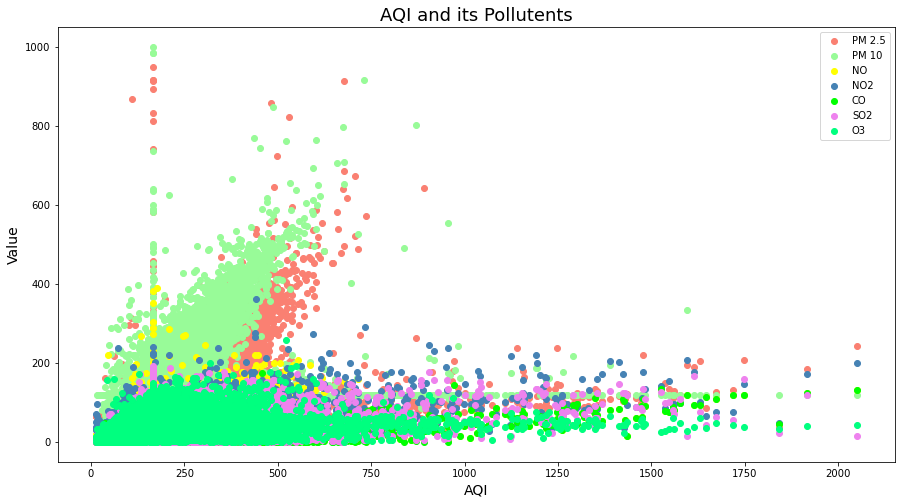

In [50]:
x=prepareddata['AQI']
y1=prepareddata['PM2.5']
y2=prepareddata['PM10']
y3=prepareddata['NO']
y4=prepareddata['NO2']
y5=prepareddata['CO']
y6=prepareddata['SO2']
y7=prepareddata['O3']
plt.figure(figsize=(15,8))
plt.scatter(x,y1,label='PM 2.5',color='salmon')
plt.scatter(x,y2,label='PM 10',color='palegreen')
plt.scatter(x,y3,label='NO',color='yellow')
plt.scatter(x,y4,label='NO2',color='steelblue')
plt.scatter(x,y5,label='CO',color='lime')
plt.scatter(x,y6,label='SO2',color='violet')
plt.scatter(x,y7,label='O3',color='springgreen')
plt.title('AQI and its Pollutents',fontsize=18)
plt.xlabel('AQI',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.legend()
plt.show()

# HEATMAP

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.

<AxesSubplot:>

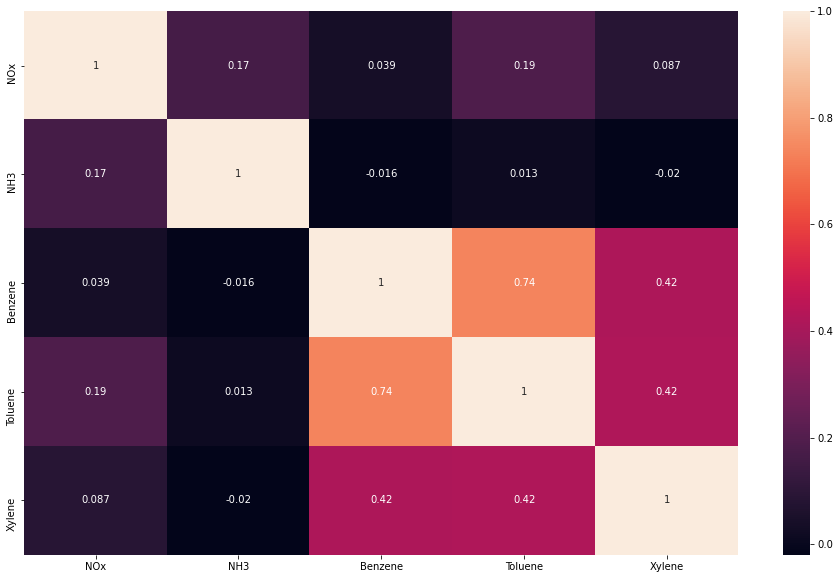

In [51]:
plt.figure(figsize = (16,10))

sns.heatmap(data.corr(), annot =True)

# HISTOGRAM

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

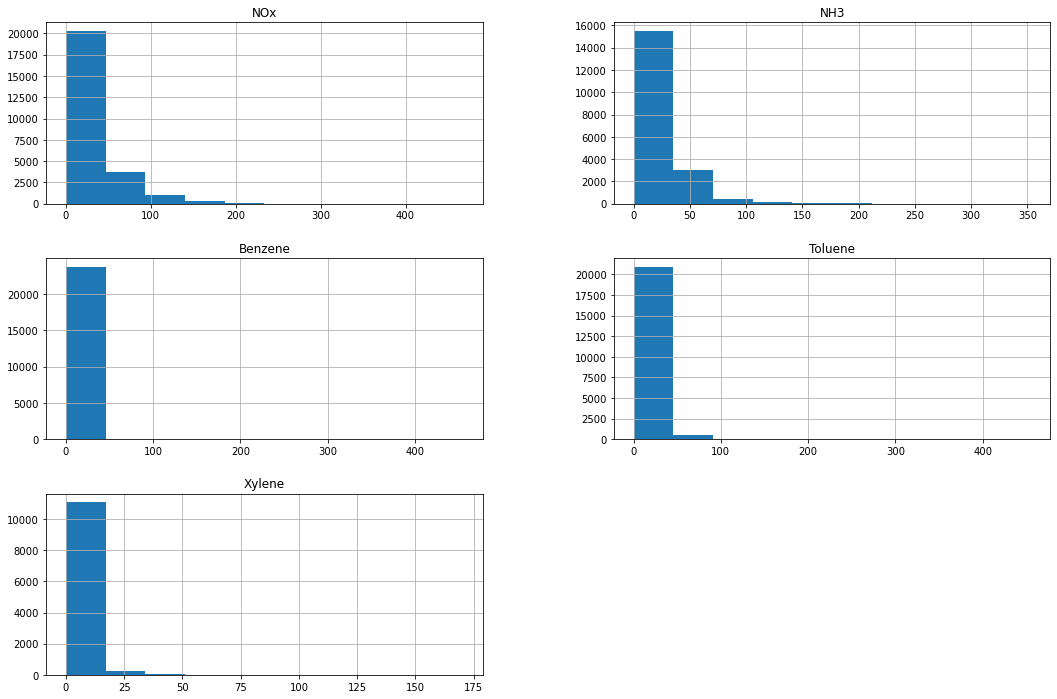

In [52]:
data.hist(figsize=(18,12))
plt.show()

# SCATTER PLOT

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

# PAIRPLOT

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

# RELPLOT

This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. ... relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

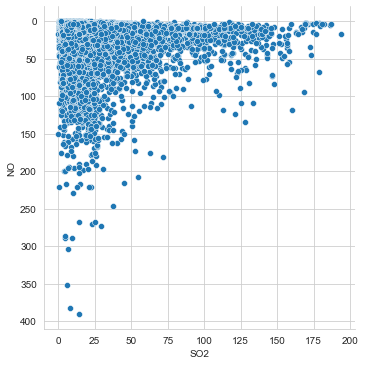

In [55]:
sns.relplot(x='SO2', y= 'NO', data=data)

# JOINTPLOT

Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.

# KDE PLOT (DENSITY PLOT)

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

# BARPLOT

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

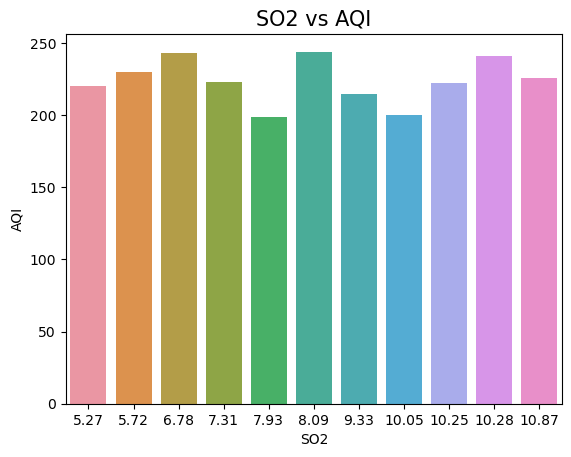

In [64]:
plt.style.use("default")
sns.barplot(x="SO2", y="AQI",data=data[179:190])
plt.title("SO2 vs AQI",fontsize=15)
plt.xlabel("SO2")
plt.ylabel("AQI")
plt.show()

# Step 6: Spliting the Dataset

In [73]:
prepareddata

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166
...,...,...,...,...,...,...,...,...
29526,15,50,7,25,0,8,23,41
29527,24,74,3,26,0,12,30,70
29528,22,65,3,29,0,8,30,68
29529,16,49,4,29,0,9,28,54


In [75]:
x=prepareddata[['PM2.5', 'PM10', 'NO', 'NO2','CO','SO2','O3']]  
y=prepareddata['AQI']

In [76]:
x.shape

(29531, 7)

In [77]:
y.shape

(29531,)

In [78]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

# Step 7: Model Creation

In [79]:
reg1 = LinearRegression()
# Fitting data into the model.
reg1.fit(x_train, y_train)

LinearRegression()

In [80]:
# Making predictions 
pred1 = reg1.predict(x_test)
pred1

array([ 47.96085012, 168.80272826,  90.74082581, ..., 168.80272826,
       168.99176534, 168.80272826])

In [81]:
print("Accuracy of the LinearRegression model comes to be: \n ") 
print(reg1.score(x_train,y_train))

Accuracy of the LinearRegression model comes to be: 
 
0.7965706419307541


In [82]:
reg2 = DecisionTreeRegressor()
#Fitting data into the model.
reg2.fit(x_train, y_train)

DecisionTreeRegressor()

In [83]:
# Making predictions on Test data 
pred2 = reg2.predict(x_test)
pred2

array([ 63.        , 164.20332278,  78.        , ..., 164.20332278,
       153.        , 164.20332278])

In [84]:
print("Accuracy of the Decision Tree Regressor  model comes to be: \n ") 
print(reg2.score(x_train,y_train))

Accuracy of the Decision Tree Regressor  model comes to be: 
 
0.9989891407485304


In [85]:
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train,y_train)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(x_train,y_train)))

Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 63.0121 	 		 0.7966
Decision Tree Regressor		 62.6813 	 		 0.9990


In [87]:
predict = reg1.predict(x_test)